In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sidetable
warnings.filterwarnings('ignore') # Vamos a prevenir errores xD

## Objetivos

- En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

- 📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

EJERCICIO 1: Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [5]:
# Establecemos el tamaños de nuestras figuras
plt.rcParams["figure.figsize"] = (6,8)

In [6]:
df=pd.read_csv('../EDA/datos/attack_limpieza2.csv', index_col=0)
df.head(2)

,case_number,year,type,country,activity,age,time,species_,mes,fatal_,sex2,cleaned_species
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,27,NaN,NAN,NaN,y,F,Undefined
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,27,NaN,NAN,May,y,NaN,Undefined


EJERCICIO 2: Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [7]:
unicos= df.stb.freq(["country"])
unicos=unicos[:10]
unicos=unicos["country"].unique()
unicos

array(['usa', 'australia', 'south africa', 'papua new guinea',
       'new zealand', 'brazil', 'bahamas', 'mexico', 'italy', 'fiji'],
      dtype=object)

In [8]:
paises=df[(df["country"]=="usa") | (df["country"]=="australia")|\
          (df["country"]=="south africa") | (df["country"]=="papua new guinea")|\
          (df["country"]=="new zealand") | (df["country"]=="brazil")|\
          (df["country"]=="bahamas") | (df["country"]=="mexico")|\
          (df["country"]=="italy") | (df["country"]=="fiji")]


In [9]:
paises

,case_number,year,type,country,activity,age,time,species_,mes,fatal_,sex2,cleaned_species
3,1791.00.00,1791,Unprovoked,australia,NaN,27,NaN,NAN,NaN,y,F,Undefined
4,1788.05.10,1788,Boat,australia,Fishing,27,NaN,NAN,May,n,NaN,Undefined
10,1780.08.08,1780,Unprovoked,usa,Swimming,27,NaN,NAN,Aug,y,M,Undefined
11,1779.00.00,1779,Unprovoked,usa,Surfing,27,NaN,NAN,NaN,y,M,Undefined
14,1771.07.12.R,1771,Unprovoked,usa,Fishing,27,NaN,NAN,Jul,y,M,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,1806.04.24,1896,Sea Disaster,usa,NaN,27,NaN,NAN,Aug,NaN,M,Undefined
6278,1805.09.00,1805,Invalid,usa,NaN,27,NaN,Shark involvement prior to death unconfirmed,Sep,NaN,M,Undefined
6279,1804.02.26.R,1804,Boat,australia,NaN,27,NaN,NAN,Feb,n,NaN,Undefined
6280,1803.05.17,1803,Sea Disaster,usa,NaN,27,NaN,NAN,May,n,M,Undefined


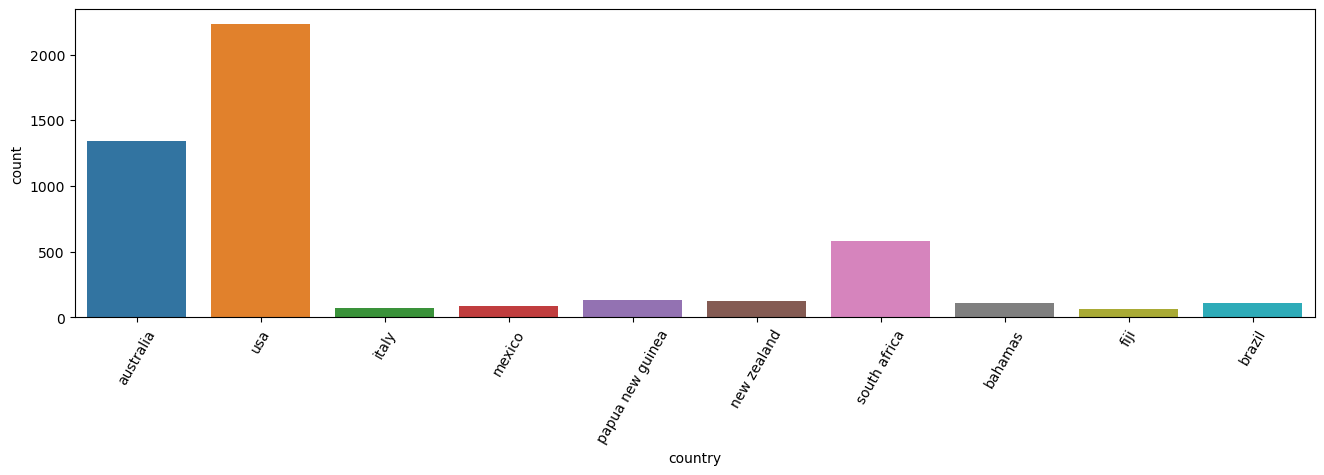

In [10]:
plt.figure(figsize =(16,4))
sns.countplot("country", data = paises)
plt.xticks(rotation = 60); 
plt.show(); 

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

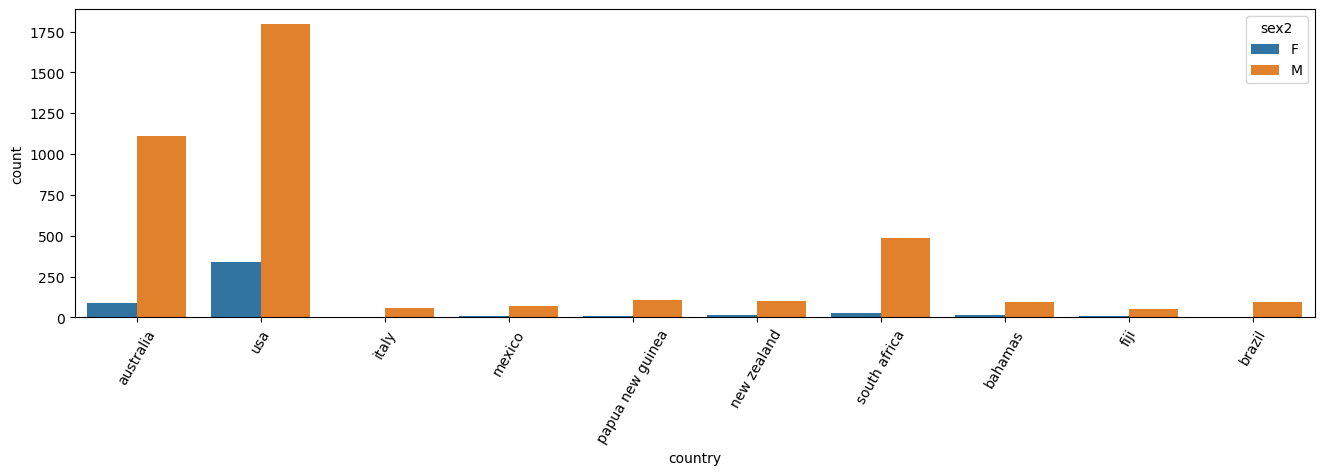

In [11]:
plt.figure(figsize =(16,4))
sns.countplot("country", data = paises, hue= "sex2")
plt.xticks(rotation = 60); 
plt.show(); 

R= Si, hay bastante diferencia entre hombres y mujeres, siendo los primeros lo que tienen más ataques en comparación con las mujeres.

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

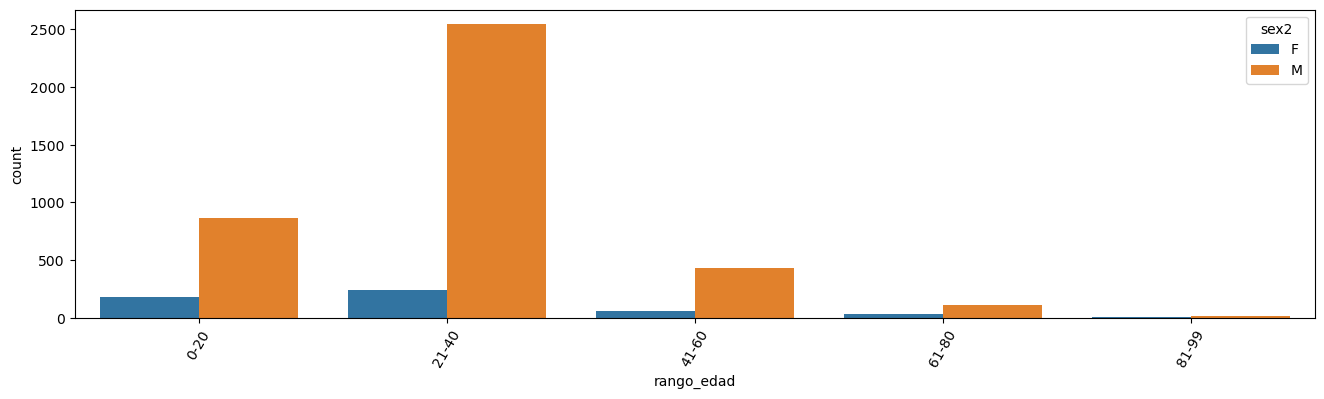

In [12]:
paises["rango_edad"]=pd.cut(paises["age"],5, labels=["0-20","21-40","41-60","61-80","81-99"])
plt.figure(figsize =(16,4))
sns.countplot("rango_edad", data = paises, hue="sex2")
plt.xticks(rotation = 60); 
plt.show();

R= El edad entre los 21 y 40 años es que la recibe más ataques.

- Ataques entre sexos, ¿hay diferencia?

R= Con el mismo gráfico podemos ver que los hombres entra 21 y 40 años son los que reciben más ataques.

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

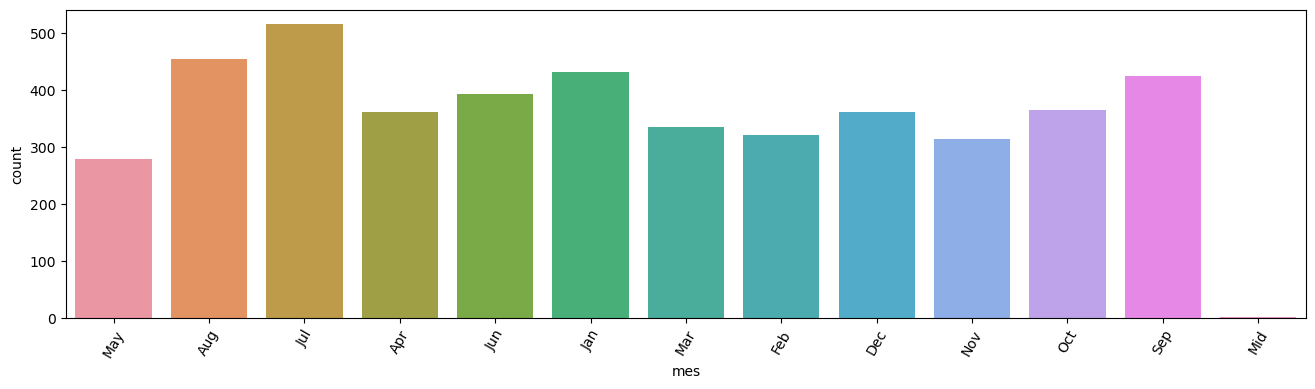

In [13]:
plt.figure(figsize =(16,4))
sns.countplot("mes", data = paises)
plt.xticks(rotation = 60); 
plt.show();

R= En verano (agosto y julio) suelen ocurrir más ataques.

Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.